<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.1 
# *Logistic Regression*

## Predicting Survival on the Titanic

The Titanic sank during her maiden voyage after colliding with an iceberg (April 15, 1912). Due to a commercial decision there were insufficient lifeboats, a fact that was partially responsible for the loss 1,502 out of 2,224 passengers and crew. 

The Titanic dataset incorporates many features of typical real-world problems: a mixture of continuous and discrete features, missing data, linear covariance, and an element of random chance. Predicting survival therefore involves many practical data science skills.

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline

### 1. Load Data

Load the `titanic.csv` file into a DataFrame named "titanic", with index column = `PassengerId`. Display the head of the DataFrame.

In [130]:
# ANSWER
titanic_csv = 'C:\\Users\\apple\\Downloads\\titanic_train.csv'
titanic = pd.read_csv(titanic_csv, index_col="PassengerId")

Why would we want to set an index column based on `PassengerId`?

ANSWER: This column is the key to training and testing our model. We use it to partition the dataset and to test the predictions of our model against known outcomes.

<a name="datadictionary"></a>
### 2. Data Dictionary 

If a data dictionary is available, it is handy to include it in the notebook for reference:

| Variable |                                 Definition | Key                                            |
|----------|-------------------------------------------:|------------------------------------------------|
| Survival | Survival                                   | 0 = No, 1 = Yes                                |
| Pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| SibSp    | # of siblings / spouses aboard the Titanic |                                                |
| Parch    | # of parents / children aboard the Titanic |                                                |
| Ticket   | Ticket number                              |                                                |
| Fare     | Passenger fare                             |                                                |
| Cabin    | Cabin number                               |                                                |
| Embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

### 2. EDA

Explore dataset. Find features to predict `Survived`. Get rid of null values. 

In [132]:
# ANSWER
titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [131]:
titanic.shape

(891, 11)

In [134]:
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [135]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [29]:
titanic_features = titanic.drop(['Name','Sex',"Ticket","Cabin","Embarked"], axis = 1)
titanic_features

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.0,1,0,7.2500
2,1,1,38.0,1,0,71.2833
3,1,3,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000
888,1,1,19.0,0,0,30.0000
889,0,3,NaN,1,2,23.4500


In [136]:
titanic_features.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [164]:
corr_survived=titanic_features.corr()['Survived'].sort_values()
#corr_survived=corr_survived.to_frame()
corr_survived=pd.DataFrame([corr_survived])

In [165]:
corr_survived

,Pclass,Age,SibSp,Parch,Fare,Survived
Survived,-0.338481,-0.077221,-0.035322,0.081629,0.257307,1.0


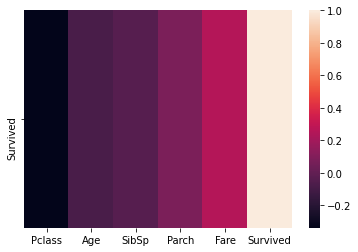

In [166]:
sns.heatmap(corr_survived)
plt.show()

In [150]:
X =titanic_features.drop('Survived', axis=1)
X.shape

(891, 5)

<AxesSubplot:>

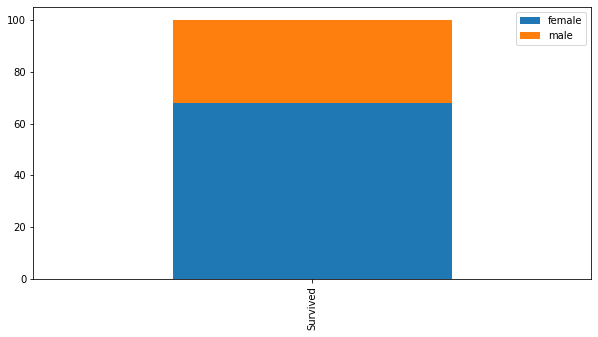

In [178]:
survived = titanic[titanic['Survived']==1]['Sex'].value_counts(normalize=True)*100
survived
df = pd.DataFrame([survived])
df.index = ['Survived']
df
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [151]:
def bar_chart(train, feature):
    survived = train[train['Survived']==1][feature].value_counts(normalize=True)*100
    dead = train[train['Survived']==0][feature].value_counts(normalize=True)*100
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

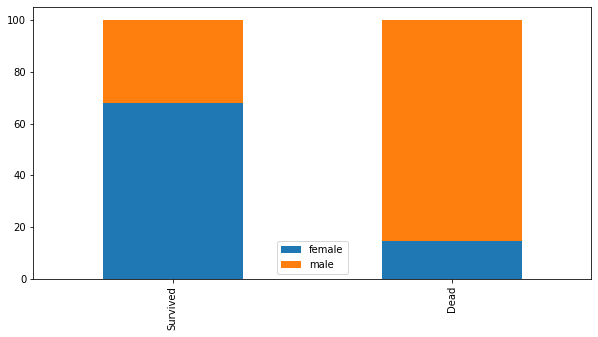

In [152]:
# Sex
bar_chart(titanic, 'Sex')

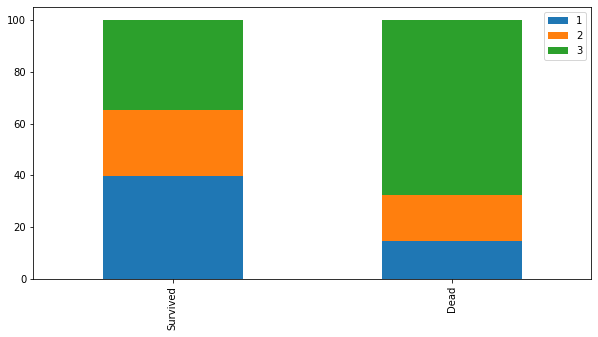

In [179]:
# Pclass
bar_chart(titanic, 'Pclass')

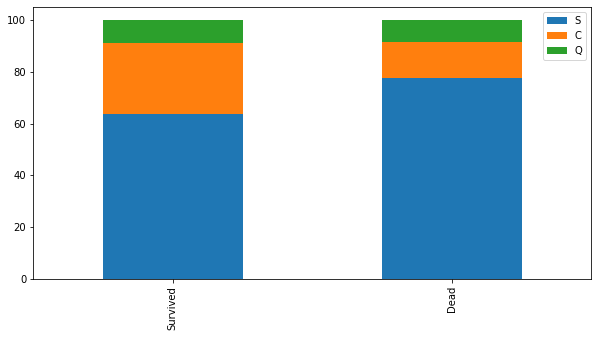

In [122]:
# Embarked
bar_chart(titanic, 'Embarked')

In [185]:
# Find median age by sex

titanic.groupby("Sex")["Age"].median()

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [184]:
# The following is an array of the median age by sex
titanic.groupby("Sex")["Age"].transform("median")

PassengerId
1      29.0
2      27.0
3      27.0
4      27.0
5      29.0
       ... 
887    29.0
888    27.0
889    27.0
890    29.0
891    29.0
Name: Age, Length: 891, dtype: float64

In [187]:
titanic['Age'].isnull().sum()


177

## 2.2 some practices 

In [188]:
import random


In [189]:
data = pd.DataFrame({
    'C' : [random.choice(('a','b','c')) for i in range(1000000)],
    'A' : [random.randint(1,10) for i in range(1000000)],
    'B' : [random.randint(1,10) for i in range(1000000)]

})

In [190]:
data

,C,A,B
0,a,5,1
1,b,10,4
2,a,5,9
3,c,8,4
4,b,10,5
...,...,...,...
999995,a,4,7
999996,c,8,4
999997,a,8,7
999998,b,9,1


In [203]:
New = data.groupby('C')["A"].mean().rename("N").reset_index()

In [204]:
New

,C,N
0,a,5.501226
1,b,5.498859
2,c,5.507500


In [207]:
df_1 = data.merge(New)
df_1

,C,A,B,N
0,a,5,1,5.501226
1,a,5,9,5.501226
2,a,2,8,5.501226
3,a,6,2,5.501226
4,a,3,4,5.501226
...,...,...,...,...
999995,c,2,1,5.507500
999996,c,2,5,5.507500
999997,c,8,7,5.507500
999998,c,7,9,5.507500


In [197]:
%%timeit

data.groupby('C')["A"].mean()
mean =data.groupby('C')["A"].mean().rename("N").reset_index()
df_1 = data.merge(mean)

385 ms ± 17.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [209]:
%%timeit
data['N3'] = data.groupby(['C'])['A'].transform('mean')

129 ms ± 16.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [211]:
data

,C,A,B,N3
0,a,5,1,5.501226
1,b,10,4,5.498859
2,a,5,9,5.501226
3,c,8,4,5.507500
4,b,10,5,5.498859
...,...,...,...,...
999995,a,4,7,5.501226
999996,c,8,4,5.507500
999997,a,8,7,5.501226
999998,b,9,1,5.498859


In [247]:
# fill missing age with median age for each sex (0 (male), 1 (female))
titanic["Age"].fillna(titanic.groupby("Sex")["Age"].transform("median"),inplace=True )

In [248]:
titanic['Age'].isnull().sum()

0

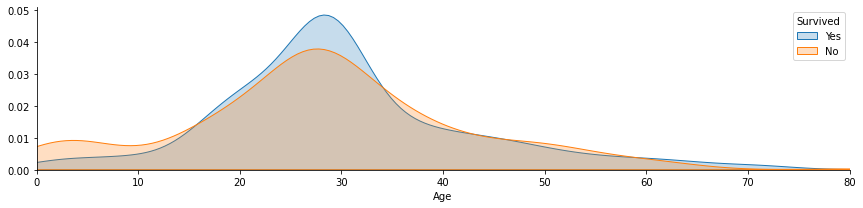

In [273]:
facet=sns.FacetGrid(titanic, hue="Survived",hue_order=[0,1], aspect=4).map(sns.kdeplot, "Age", shade= True)
#facet.add_legend(legend_data={0:'No',1:"Yes"},adjust_subtitles=True,)
#facet.add_legend()
#plt.legend(['Yes',"No"]) 
facet.set(xlim=(0, titanic["Age"].max()))
plt.legend( title ="Survived",labels=['Yes', 'No'])

plt.show()

In [225]:
def facetgridplot(train, var):
    facet = sns.FacetGrid(train, hue="Survived", aspect=4)
    facet.map(sns.kdeplot, var, shade= True)
    facet.set(xlim=(0, train[var].max()))
    facet.add_legend()
    plt.show();

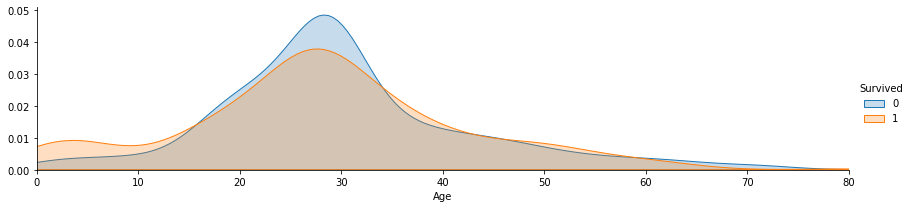

In [219]:
# Age
facetgridplot(titanic, 'Age')

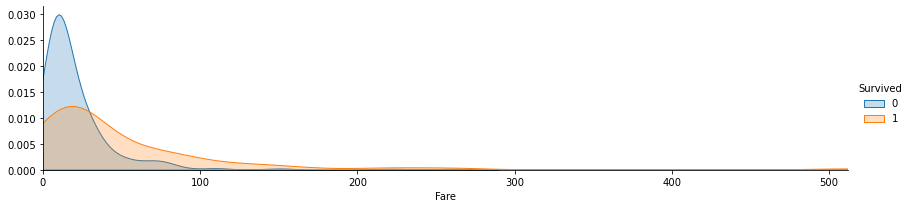

In [220]:
# Fare
facetgridplot(titanic, 'Fare')

In [222]:
# fill missing embarked with `S` as most people embarked from there
titanic['Embarked'].fillna('S', inplace=True)

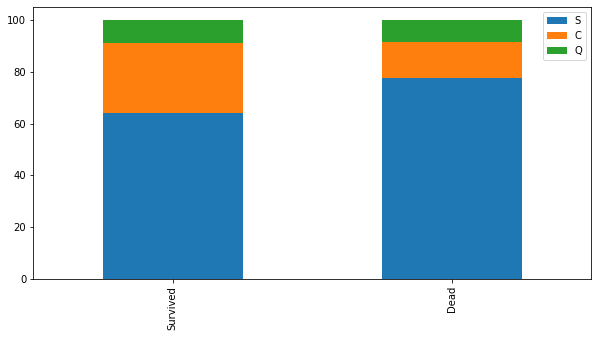

In [223]:
bar_chart(titanic, 'Embarked')

### 3. Numerical Predictors Only

#### 3.1. Set Target and Features

To begin, let's try a model based on the passenger class (`Pclass`) and parents/children features (`Parch`):

In [274]:
# ANSWER
X=X[['Pclass','Parch']]
X

,Pclass,Parch
PassengerId,,
1,3,0
2,1,0
3,3,0
4,1,0
5,3,0
...,...,...
887,2,0
888,1,0
889,3,2


In [280]:
y=titanic['Survived']
y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

#### 3.2 Partition

Partition the data into training and testing subsets:

- Use `random_state` = 1

In [276]:
# ANSWER
## Create training and testing subsets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

#### 3.3. Build Model

Prepare a model by creating an instance of the `LogisticRegression` class from the `sklearn.linear_model` library:

In [277]:
# ANSWER
# Create Model
model = LogisticRegression()

Now train it on the training data subset, using the `fit` method of the model object (Nb. by default, `fit` will print the hyperparameters of the model):

In [278]:
# ANSWER
# Fit Model
fit = model.fit(X_train, y_train)

The computed coefficients are an array (`coef_`) stored in the 1st element of an array:

In [281]:
fit.coef_

array([[-0.90824213,  0.33432156]])

In [282]:
X.columns

Index(['Pclass', 'Parch'], dtype='object')

The computed intercept (`intercept_`) is the 1st element of another array:

In [283]:
# ANSWER
fit.intercept_

array([1.40820621])

We can create tuples of the predictor names and coefficients like this:

In [284]:
# ANSWER
#print(set(zip(feature_cols, model.coef_[0])))
print(set(zip(X.columns, fit.coef_[0])))

{('Pclass', -0.9082421341469832), ('Parch', 0.33432155514777906)}


If we want formatted output, here is a neat way to list the coefficients by predictor:

In [285]:
for col in zip(X_train.columns, fit.coef_[0]):
    print('{:<10s}  {:+.06f}'.format(col[0], col[1]))  # Nb. increase 10 for longer names

Pclass      -0.908242
Parch       +0.334322


This result implies that survival declines with passenger class (i.e. 1st class is highest) but increases with the number of parents or children in a group.

Let's see how well the model fit the training data. The `accuracy_score` is the proportion of correct predictions:

In [287]:
# ANSWER
print('accuracy = {:7.4f}'.format(fit.score(X_train, y_train)))
#fit.score(X_train, y_train)

accuracy =  0.6924


What is the  `accuracy_score` for the test data?

In [288]:
# ANSWER
fit.score(X_test, y_test)

0.6536312849162011

What can we say aout this result?

ANSWER
- ...
- ...

#### 3.4. Add `AGE` as Feature

Let's include `Age` in the model. As we know from our EDA, this feature has many missing values. We don't want to throw away so many rows, so we will replace `NA` values with imputed values (e.g. the overall mean age):

In [295]:
# ANSWER

titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

In [296]:
titanic.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [292]:
X = titanic[['Age','Pclass','Parch']]
X

,Age,Pclass,Parch
PassengerId,,,
1,22.0,3,0
2,38.0,1,0
3,26.0,3,0
4,35.0,1,0
5,35.0,3,0
...,...,...,...
887,27.0,2,0
888,19.0,1,0
889,27.0,3,2


In [297]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [299]:
# Build Model
model = LogisticRegression()

# Fit Model
fit = model.fit(X_train, y_train)
# Score
fit.score(X_train, y_train)

0.7219101123595506

So, including age did little to reduce the variance in our model. Why might this be?

ANSWER

- ...
- ...
- ...

Let's see where the model is going wrong by showing the Confusion Matrix:

In [301]:
fit.score(X_test, y_test)

0.664804469273743

In [302]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [335]:
# ANSWER
y_pred_class = fit.predict(X_test)
print((confusion_matrix(y_test, y_pred_class)))
C_matrix=confusion_matrix(y_test, y_pred_class)
C_matrix

[[88 18]
 [42 31]]


array([[88, 18],
       [42, 31]], dtype=int64)

In [337]:
C_matrix_transform= np.flip(C_matrix).T
C_matrix_transform

array([[31, 18],
       [42, 88]], dtype=int64)

Nb. Here is how `confusion_matrix` arranges its output:

In [304]:
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

[['TN' 'FP']
 ['FN' 'TP']]


In [325]:
A = np.asarray([['TN', 'FP'], ['FN', 'TP']])
A

array([['TN', 'FP'],
       ['FN', 'TP']], dtype='<U2')

In [326]:
np.flip(A, 0)

array([['FN', 'TP'],
       ['TN', 'FP']], dtype='<U2')

In [327]:
np.flip(A, 1)

array([['FP', 'TN'],
       ['TP', 'FN']], dtype='<U2')

In [328]:
np.flip(A)

array([['TP', 'FN'],
       ['FP', 'TN']], dtype='<U2')

In [340]:
A_transformed =np.flip(A, (0, 1)).T
A_transformed

array([['TP', 'FP'],
       ['FN', 'TN']], dtype='<U2')

In [314]:
matrix_con = np.asarray([['TN', 'FP'], ['FN', 'TP']])
matrix_con

array([['TN', 'FP'],
       ['FN', 'TP']], dtype='<U2')

In [324]:
matrix_con_90= np.rot90(matrix_con)
matrix_con_90

array([['FP', 'TP'],
       ['TN', 'FN']], dtype='<U2')

In [322]:
np.rot90(matrix_con_90)

array([['TP', 'FN'],
       ['FP', 'TN']], dtype='<U2')

In [341]:
df_confusion=pd.DataFrame(A_transformed)

In [342]:
df_confusion

,0,1
0,TP,FP
1,FN,TN


Which type of error is more prevalent?

ANSWER: ...

Maybe we aren't using the right cut-off value. By default, we are predicting that `Survival` = True if the probability >= 0.5, but we could use a different threshold. The ROC curve helps us decide (as well as showing us how good our predictive model really is):

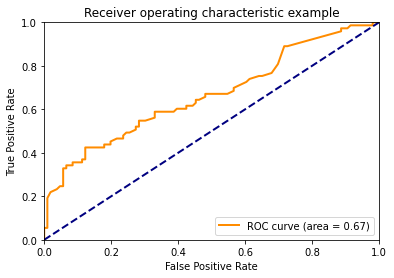

In [343]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = fit.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

### 4. Including Categorical Predictors

So far, we've only used numerical features for prediction. Let's convert the character features to dummy variables so we can include them in the model:

In [345]:
titanic_with_dummies = pd.get_dummies(data = titanic, columns = ['Sex', 'Embarked', 'Pclass'], 
                                      prefix = ['Sex', 'Embarked', 'Pclass'] )
titanic_with_dummies.head()

,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,,,
1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1,0,0,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,1,0,0
3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1,0,0,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1,1,0,0
5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1,0,0,1


So, this created a column for every possible value of every categorical variable. (A more compact approach would have been to reduce the number of dummy variables by one for each feature, so that the first vriable from each captures two possible states.)

Now that we have data on sex, embarkation port, and passenger class we can try to improve our `Age` imputation by stratifying it by the means of groups within the passenger population:

In [346]:
titanic_with_dummies['Age'] = titanic_with_dummies[["Age", "Parch", "Sex_male", "Pclass_1", "Pclass_2"]].groupby(["Parch", "Sex_male", "Pclass_1", "Pclass_2"])["Age"].transform(lambda x: x.fillna(x.mean()))

In [347]:
titanic_with_dummies['Age']

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
       ... 
887    27.0
888    19.0
889    27.0
890    26.0
891    32.0
Name: Age, Length: 891, dtype: float64

In [95]:
titanic_with_dummies

,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,,,
1,0,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1,0,0,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C85,1,0,1,0,0,1,0,0
3,1,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1,0,0,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,C123,1,0,0,0,1,1,0,0
5,0,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,NaN,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,NaN,0,1,0,0,1,0,1,0
888,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,B42,1,0,0,0,1,1,0,0
889,0,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,NaN,1,0,0,0,1,0,0,1


Now train the model using the expanded set of predictors and compute the accuracy score for the test set:

In [348]:
# ANSWER
# Set Feature Both Numerical, Categorical
X=titanic_with_dummies.drop(['Survived','Ticket','Cabin','Name'],axis=1)
X

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,
1,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
2,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
3,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
4,35.0,1,0,53.1000,1,0,0,0,1,1,0,0
5,35.0,0,0,8.0500,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
887,27.0,0,0,13.0000,0,1,0,0,1,0,1,0
888,19.0,0,0,30.0000,1,0,0,0,1,1,0,0
889,27.0,1,2,23.4500,1,0,0,0,1,0,0,1


In [349]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [351]:
model = LogisticRegression()

# Fit Model
fit = model.fit(X_train, y_train)
# Score
fit.score(X_train, y_train)

C:\Users\apple\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8132022471910112

Plot the ROC curve for the new model:

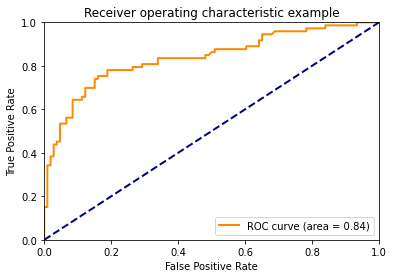

In [353]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = fit.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

Can we improve the model by including the remaining features?

In [116]:
# ANSWER

## Homework

1. Remove the `random_state` parameter (if you have used), so that the data partition will be different every time, and run through the final modelling process a few times. Do the results change?

2. Use cross-validation to assess the quality of the model when overfitting is controlled. Does the accuracy improve?

3. Look at the `fpr` & `tpr` vectors for the best model.

In [354]:
from sklearn.model_selection import cross_val_score
target_col = 'Survived'
feature_cols = ['Age', 'SibSp', 'Parch', 'Fare', 
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Pclass_1', 'Pclass_2', 'Pclass_3']
logreg = LogisticRegression()
scores = cross_val_score(logreg, titanic_with_dummies[feature_cols], titanic_with_dummies[target_col], cv=5)
scores.mean()

C:\Users\apple\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\apple\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.793496955621116

In [355]:
# Build Model
logreg = LogisticRegression()

# Fit
logreg.fit(X_train, y_train)

# Predict
y_pred_class = logreg.predict(X_test)

# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)

#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[92 14]
 [22 51]]


C:\Users\apple\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [356]:
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.7988826815642458
0.7988826815642458


In [357]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.2011173184357542
0.2011173184357542


In [359]:
specificity = TN / (TN + FP)

print(specificity)

0.8679245283018868


In [358]:
sensitivity = TP / float(FN + TP)
print(sensitivity)
print(metrics.recall_score(y_test, y_pred_class))

0.6986301369863014
0.6986301369863014


In [360]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.1320754716981132
0.13207547169811318


In [361]:
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(y_test, y_pred_class))

0.7846153846153846
0.7846153846153846




---



---



> > > > > > > > > © 2021 Institute of Data


---



---



